# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [1]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        #d = (np.array(Image.fromarray(data[0,:].reshape((28,28))).resize(size))).flatten()        
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [3]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [4]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

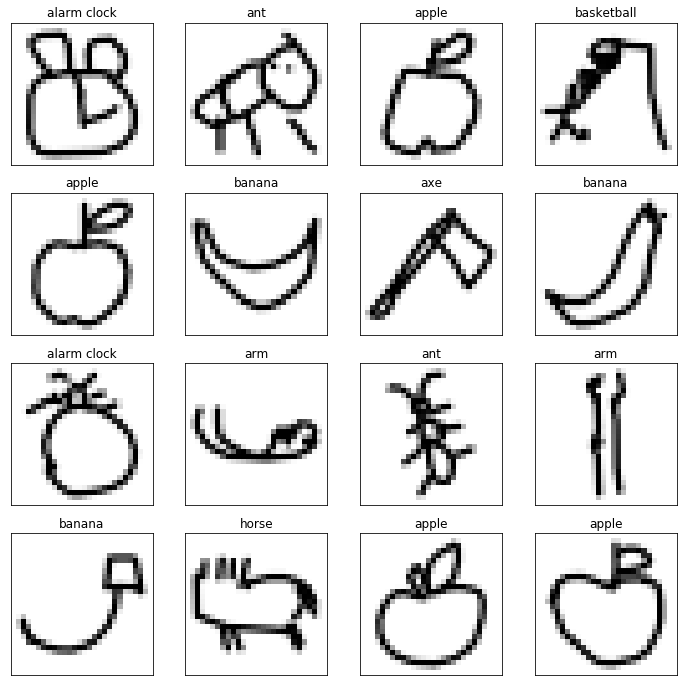

In [5]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [6]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [12]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)

Epoch 1/500
 60224/100000 [=================>............] - ETA: 2s - loss: 4.1443 - accuracy: 0.5727

KeyboardInterrupt: 

In [18]:
start_time2 = time.time()
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
duration2 = time.time() - start_time2
print('Time elapsed - {} seconds.'.format(duration2))

Epoch 1/500
100000/100000 [==============================] - 15s 148us/step - loss: 1.1472 - accuracy: 0.6931
Epoch 2/500
100000/100000 [==============================] - 15s 146us/step - loss: 0.8618 - accuracy: 0.7714
Epoch 3/500
100000/100000 [==============================] - 16s 157us/step - loss: 0.9097 - accuracy: 0.7758
Epoch 4/500
100000/100000 [==============================] - 16s 158us/step - loss: 1.1137 - accuracy: 0.7356
Epoch 5/500
100000/100000 [==============================] - 16s 157us/step - loss: 1.3241 - accuracy: 0.6845
Epoch 6/500
100000/100000 [==============================] - 16s 158us/step - loss: 1.5883 - accuracy: 0.6342
Epoch 7/500
100000/100000 [==============================] - 16s 159us/step - loss: 1.8347 - accuracy: 0.5396
Epoch 8/500
100000/100000 [==============================] - 16s 161us/step - loss: 2.5793 - accuracy: 0.3105
Epoch 9/500
100000/100000 [==============================] - 17s 168us/step - loss: 2.8280 - accuracy: 0.2124
Epoch 10/5

100000/100000 [==============================] - 15s 148us/step - loss: 2.3028 - accuracy: 0.0984
Epoch 148/500
100000/100000 [==============================] - 15s 148us/step - loss: 2.3027 - accuracy: 0.0984
Epoch 149/500
100000/100000 [==============================] - 15s 147us/step - loss: 2.3028 - accuracy: 0.0994
Epoch 150/500
100000/100000 [==============================] - 15s 148us/step - loss: 2.3028 - accuracy: 0.0979
Epoch 151/500
100000/100000 [==============================] - 15s 146us/step - loss: 2.3028 - accuracy: 0.0988
Epoch 152/500
100000/100000 [==============================] - 16s 161us/step - loss: 2.3028 - accuracy: 0.0993
Epoch 153/500
100000/100000 [==============================] - 15s 155us/step - loss: 2.3028 - accuracy: 0.0997
Epoch 154/500
100000/100000 [==============================] - 15s 155us/step - loss: 2.3027 - accuracy: 0.1009
Epoch 155/500
100000/100000 [==============================] - 16s 155us/step - loss: 2.3028 - accuracy: 0.0976
Epoch 

100000/100000 [==============================] - 14s 141us/step - loss: 2.3027 - accuracy: 0.0998
Epoch 293/500
100000/100000 [==============================] - 14s 145us/step - loss: 2.3028 - accuracy: 0.1003
Epoch 294/500
100000/100000 [==============================] - 14s 142us/step - loss: 2.3028 - accuracy: 0.0988
Epoch 295/500
100000/100000 [==============================] - 14s 143us/step - loss: 2.3028 - accuracy: 0.0999
Epoch 296/500
100000/100000 [==============================] - 14s 142us/step - loss: 2.3028 - accuracy: 0.0987
Epoch 297/500
100000/100000 [==============================] - 14s 143us/step - loss: 2.3027 - accuracy: 0.0998
Epoch 298/500
100000/100000 [==============================] - 14s 140us/step - loss: 2.3027 - accuracy: 0.1007
Epoch 299/500
100000/100000 [==============================] - 14s 141us/step - loss: 2.3028 - accuracy: 0.0987
Epoch 300/500
100000/100000 [==============================] - 14s 141us/step - loss: 2.3027 - accuracy: 0.1002
Epoch 

100000/100000 [==============================] - 14s 141us/step - loss: 2.3027 - accuracy: 0.0988
Epoch 438/500
100000/100000 [==============================] - 14s 141us/step - loss: 2.3027 - accuracy: 0.0990
Epoch 439/500
100000/100000 [==============================] - 14s 142us/step - loss: 2.3027 - accuracy: 0.1000
Epoch 440/500
100000/100000 [==============================] - 14s 142us/step - loss: 2.3028 - accuracy: 0.0988
Epoch 441/500
100000/100000 [==============================] - 14s 140us/step - loss: 2.3028 - accuracy: 0.0976
Epoch 442/500
100000/100000 [==============================] - 14s 143us/step - loss: 2.3028 - accuracy: 0.0971
Epoch 443/500
100000/100000 [==============================] - 15s 145us/step - loss: 2.3027 - accuracy: 0.1001
Epoch 444/500
100000/100000 [==============================] - 14s 143us/step - loss: 2.3027 - accuracy: 0.0994
Epoch 445/500
100000/100000 [==============================] - 15s 151us/step - loss: 2.3027 - accuracy: 0.0986
Epoch 

In [8]:
import sys
old_stdout = sys.stdout
sys.stdout = open('rohit.txt', 'a')

In [10]:
sys.stdout = old_stdout

In [11]:
data_train_5=resize_images(data_train,[5,5])
start_time2 = time.time()
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train_5.shape[1]))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train_5, label_train, epochs=500, batch_size=32)
duration2 = time.time() - start_time2
print('Time elapsed - {} seconds.'.format(duration2))

data_test_5=resize_images(data_test,[5,5])
predict_test = model.predict_classes(data_test_5)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_5.shape[0]
print('Testing accuracy {}'.format(acc_test))


Epoch 1/500
100000/100000 [==============================] - 3s 28us/step - loss: 4.5344 - accuracy: 0.4176
Epoch 2/500
100000/100000 [==============================] - 3s 28us/step - loss: 1.5657 - accuracy: 0.5098
Epoch 3/500
100000/100000 [==============================] - 3s 29us/step - loss: 1.4646 - accuracy: 0.5342
Epoch 4/500
100000/100000 [==============================] - 3s 28us/step - loss: 1.4755 - accuracy: 0.5339
Epoch 5/500
100000/100000 [==============================] - 3s 27us/step - loss: 1.4903 - accuracy: 0.5327
Epoch 6/500
100000/100000 [==============================] - 3s 27us/step - loss: 1.4955 - accuracy: 0.5326
Epoch 7/500
100000/100000 [==============================] - 3s 29us/step - loss: 1.5054 - accuracy: 0.5308
Epoch 8/500
100000/100000 [==============================] - 3s 27us/step - loss: 1.5051 - accuracy: 0.5297
Epoch 9/500
100000/100000 [==============================] - 3s 28us/step - loss: 1.5059 - accuracy: 0.5294
Epoch 10/500
100000/100000 

100000/100000 [==============================] - 3s 26us/step - loss: 1.5714 - accuracy: 0.5012
Epoch 75/500
100000/100000 [==============================] - 3s 25us/step - loss: 1.5745 - accuracy: 0.5009
Epoch 76/500
100000/100000 [==============================] - 3s 25us/step - loss: 1.5725 - accuracy: 0.5026
Epoch 77/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.5645 - accuracy: 0.5013
Epoch 78/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.5702 - accuracy: 0.4985
Epoch 79/500
100000/100000 [==============================] - 3s 27us/step - loss: 1.5755 - accuracy: 0.4993
Epoch 80/500
100000/100000 [==============================] - 3s 27us/step - loss: 1.5795 - accuracy: 0.5006
Epoch 81/500
100000/100000 [==============================] - 3s 27us/step - loss: 1.5852 - accuracy: 0.4985
Epoch 82/500
100000/100000 [==============================] - 3s 27us/step - loss: 1.5944 - accuracy: 0.4988
Epoch 83/500
100000/100000 [====

100000/100000 [==============================] - 3s 26us/step - loss: 1.6551 - accuracy: 0.4825
Epoch 222/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.6633 - accuracy: 0.4812
Epoch 223/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.6623 - accuracy: 0.4812
Epoch 224/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.6667 - accuracy: 0.4785
Epoch 225/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.6497 - accuracy: 0.4818
Epoch 226/500
100000/100000 [==============================] - 3s 25us/step - loss: 1.6565 - accuracy: 0.4818
Epoch 227/500
100000/100000 [==============================] - 3s 25us/step - loss: 1.6542 - accuracy: 0.4814
Epoch 228/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.6511 - accuracy: 0.4815
Epoch 229/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.6599 - accuracy: 0.4804
Epoch 230/500
100000/100

100000/100000 [==============================] - 3s 28us/step - loss: 1.7108 - accuracy: 0.4699
Epoch 370/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.6993 - accuracy: 0.4700
Epoch 371/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.7104 - accuracy: 0.4707
Epoch 372/500
100000/100000 [==============================] - 3s 25us/step - loss: 1.6972 - accuracy: 0.4704
Epoch 373/500
100000/100000 [==============================] - 3s 27us/step - loss: 1.7169 - accuracy: 0.4706
Epoch 374/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.7119 - accuracy: 0.4694
Epoch 375/500
100000/100000 [==============================] - 2s 24us/step - loss: 1.7103 - accuracy: 0.4706
Epoch 376/500
100000/100000 [==============================] - 2s 24us/step - loss: 1.7217 - accuracy: 0.4682
Epoch 377/500
100000/100000 [==============================] - 2s 24us/step - loss: 1.7103 - accuracy: 0.4703
Epoch 378/500
100000/100

In [13]:
data_train_15=resize_images(data_train,[15,15])
start_time2 = time.time()
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train_15.shape[1]))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train_15, label_train, epochs=500, batch_size=32)
duration2 = time.time() - start_time2
print('Time elapsed - {} seconds.'.format(duration2))

data_test_15=resize_images(data_test,[15,15])
predict_test = model.predict_classes(data_test_15)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_15.shape[0]
print('Testing accuracy {}'.format(acc_test))

Epoch 1/500
100000/100000 [==============================] - 7s 70us/step - loss: 3.9170 - accuracy: 0.6276
Epoch 2/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.2071 - accuracy: 0.7227
Epoch 3/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.1684 - accuracy: 0.7406
Epoch 4/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.1591 - accuracy: 0.7489
Epoch 5/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.1416 - accuracy: 0.7545
Epoch 6/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.1475 - accuracy: 0.7602
Epoch 7/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.1475 - accuracy: 0.7628
Epoch 8/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.1430 - accuracy: 0.7656
Epoch 9/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.1293 - accuracy: 0.7662
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 3s 35us/step - loss: 0.8338 - accuracy: 0.8098
Epoch 150/500
100000/100000 [==============================] - 4s 39us/step - loss: 0.8353 - accuracy: 0.8090
Epoch 151/500
100000/100000 [==============================] - 4s 40us/step - loss: 0.8333 - accuracy: 0.8084
Epoch 152/500
100000/100000 [==============================] - 4s 41us/step - loss: 0.8442 - accuracy: 0.8088
Epoch 153/500
100000/100000 [==============================] - 4s 42us/step - loss: 0.8318 - accuracy: 0.8104
Epoch 154/500
100000/100000 [==============================] - 4s 41us/step - loss: 0.8305 - accuracy: 0.8101
Epoch 155/500
100000/100000 [==============================] - 4s 39us/step - loss: 0.8386 - accuracy: 0.8104
Epoch 156/500
100000/100000 [==============================] - 4s 38us/step - loss: 0.8269 - accuracy: 0.8105
Epoch 157/500
100000/100000 [==============================] - 4s 39us/step - loss: 0.8325 - accuracy: 0.8094
Epoch 158/500
100000/100

100000/100000 [==============================] - 4s 39us/step - loss: 0.7389 - accuracy: 0.8180
Epoch 298/500
100000/100000 [==============================] - 4s 39us/step - loss: 0.7459 - accuracy: 0.8177
Epoch 299/500
100000/100000 [==============================] - 4s 39us/step - loss: 0.7479 - accuracy: 0.8181
Epoch 300/500
100000/100000 [==============================] - 4s 39us/step - loss: 0.7469 - accuracy: 0.8178
Epoch 301/500
100000/100000 [==============================] - 4s 39us/step - loss: 0.7578 - accuracy: 0.8187
Epoch 302/500
100000/100000 [==============================] - 4s 39us/step - loss: 0.7466 - accuracy: 0.8185
Epoch 303/500
100000/100000 [==============================] - 6s 65us/step - loss: 0.7435 - accuracy: 0.8171
Epoch 304/500
100000/100000 [==============================] - 4s 38us/step - loss: 0.7515 - accuracy: 0.8175
Epoch 305/500
100000/100000 [==============================] - 4s 36us/step - loss: 0.7482 - accuracy: 0.8174
Epoch 306/500
100000/100

100000/100000 [==============================] - 5s 52us/step - loss: 0.7219 - accuracy: 0.8158
Epoch 446/500
100000/100000 [==============================] - 3s 34us/step - loss: 0.7490 - accuracy: 0.8156
Epoch 447/500
100000/100000 [==============================] - 4s 35us/step - loss: 0.7397 - accuracy: 0.8148
Epoch 448/500
100000/100000 [==============================] - 4s 41us/step - loss: 0.7267 - accuracy: 0.8159
Epoch 449/500
100000/100000 [==============================] - 4s 42us/step - loss: 0.7375 - accuracy: 0.8152
Epoch 450/500
100000/100000 [==============================] - 4s 42us/step - loss: 0.7327 - accuracy: 0.8147
Epoch 451/500
100000/100000 [==============================] - 4s 44us/step - loss: 0.7308 - accuracy: 0.8155
Epoch 452/500
100000/100000 [==============================] - 4s 44us/step - loss: 0.7500 - accuracy: 0.8155
Epoch 453/500
100000/100000 [==============================] - 4s 44us/step - loss: 0.7457 - accuracy: 0.8145
Epoch 454/500
100000/100

In [7]:
start_time2 = time.time()
model = Sequential()
model.add(Dense(256, activation='relu',input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
duration2 = time.time() - start_time2
print('Time elapsed - {} seconds.'.format(duration2))

predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))


Epoch 1/500
100000/100000 [==============================] - 11s 108us/step - loss: 1.1553 - accuracy: 0.6932
Epoch 2/500
100000/100000 [==============================] - 11s 109us/step - loss: 0.8668 - accuracy: 0.7692
Epoch 3/500
100000/100000 [==============================] - 11s 110us/step - loss: 0.8397 - accuracy: 0.7848
Epoch 4/500
100000/100000 [==============================] - 12s 116us/step - loss: 0.8742 - accuracy: 0.7838
Epoch 5/500
100000/100000 [==============================] - 12s 118us/step - loss: 0.9707 - accuracy: 0.7645
Epoch 6/500
100000/100000 [==============================] - 12s 115us/step - loss: 1.1405 - accuracy: 0.7470
Epoch 7/500
100000/100000 [==============================] - 11s 114us/step - loss: 1.5035 - accuracy: 0.6908
Epoch 8/500
100000/100000 [==============================] - 12s 116us/step - loss: 1.5187 - accuracy: 0.6213
Epoch 9/500
100000/100000 [==============================] - 11s 115us/step - loss: 2.1268 - accuracy: 0.4550
Epoch 10/

100000/100000 [==============================] - 12s 118us/step - loss: 2.3028 - accuracy: 0.0993
Epoch 74/500
100000/100000 [==============================] - 15s 153us/step - loss: 2.3027 - accuracy: 0.1000
Epoch 75/500
100000/100000 [==============================] - 13s 134us/step - loss: 2.3028 - accuracy: 0.0988
Epoch 76/500
100000/100000 [==============================] - 11s 114us/step - loss: 2.3027 - accuracy: 0.0992
Epoch 77/500
100000/100000 [==============================] - 12s 116us/step - loss: 2.3028 - accuracy: 0.0979
Epoch 78/500
100000/100000 [==============================] - 14s 137us/step - loss: 2.3027 - accuracy: 0.0997
Epoch 79/500
100000/100000 [==============================] - 13s 132us/step - loss: 2.3028 - accuracy: 0.0991
Epoch 80/500
100000/100000 [==============================] - 12s 116us/step - loss: 2.3028 - accuracy: 0.0988
Epoch 81/500
100000/100000 [==============================] - 11s 112us/step - loss: 2.3027 - accuracy: 0.1001
Epoch 82/500
1

100000/100000 [==============================] - 11s 105us/step - loss: 2.3027 - accuracy: 0.0989
Epoch 147/500
100000/100000 [==============================] - 10s 102us/step - loss: 2.3028 - accuracy: 0.0998
Epoch 148/500
100000/100000 [==============================] - 11s 107us/step - loss: 2.3027 - accuracy: 0.0998
Epoch 149/500
100000/100000 [==============================] - 10s 103us/step - loss: 2.3028 - accuracy: 0.1000
Epoch 150/500
100000/100000 [==============================] - 10s 104us/step - loss: 2.3027 - accuracy: 0.0986
Epoch 151/500
100000/100000 [==============================] - 11s 111us/step - loss: 2.3027 - accuracy: 0.0997
Epoch 152/500
100000/100000 [==============================] - 10s 103us/step - loss: 2.3028 - accuracy: 0.0985
Epoch 153/500
100000/100000 [==============================] - 10s 102us/step - loss: 2.3028 - accuracy: 0.0996
Epoch 154/500
100000/100000 [==============================] - 10s 102us/step - loss: 2.3027 - accuracy: 0.0987
Epoch 

100000/100000 [==============================] - 10s 100us/step - loss: 2.3027 - accuracy: 0.0998
Epoch 220/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.3028 - accuracy: 0.0998
Epoch 221/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.3027 - accuracy: 0.0992
Epoch 222/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.3028 - accuracy: 0.0994
Epoch 223/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.3028 - accuracy: 0.1001
Epoch 224/500
100000/100000 [==============================] - 10s 102us/step - loss: 2.3028 - accuracy: 0.1001
Epoch 225/500
100000/100000 [==============================] - 10s 101us/step - loss: 2.3027 - accuracy: 0.1005
Epoch 226/500
100000/100000 [==============================] - 10s 101us/step - loss: 2.3028 - accuracy: 0.0981
Epoch 227/500
100000/100000 [==============================] - 10s 101us/step - loss: 2.3027 - accuracy: 0.1002
Epoch 

100000/100000 [==============================] - 10s 100us/step - loss: 2.3028 - accuracy: 0.0987
Epoch 293/500
100000/100000 [==============================] - 10s 99us/step - loss: 2.3027 - accuracy: 0.0990
Epoch 294/500
100000/100000 [==============================] - 10s 99us/step - loss: 2.3028 - accuracy: 0.0984
Epoch 295/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.3027 - accuracy: 0.1013
Epoch 296/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.3028 - accuracy: 0.0975
Epoch 297/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.3028 - accuracy: 0.0981
Epoch 298/500
100000/100000 [==============================] - 10s 101us/step - loss: 2.3027 - accuracy: 0.1003
Epoch 299/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.3028 - accuracy: 0.0989
Epoch 300/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.3027 - accuracy: 0.0988
Epoch 30

100000/100000 [==============================] - 11s 106us/step - loss: 2.3027 - accuracy: 0.0990
Epoch 366/500
100000/100000 [==============================] - 11s 106us/step - loss: 2.3028 - accuracy: 0.0998
Epoch 367/500
100000/100000 [==============================] - 11s 109us/step - loss: 2.3028 - accuracy: 0.0976
Epoch 368/500
100000/100000 [==============================] - 11s 110us/step - loss: 2.3028 - accuracy: 0.0979
Epoch 369/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.3028 - accuracy: 0.0980
Epoch 370/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.3028 - accuracy: 0.0997
Epoch 371/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.3027 - accuracy: 0.1007
Epoch 372/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.3028 - accuracy: 0.0984
Epoch 373/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.3027 - accuracy: 0.0989
Epoch 

100000/100000 [==============================] - 12s 118us/step - loss: 2.3028 - accuracy: 0.0993
Epoch 438/500
100000/100000 [==============================] - 17s 171us/step - loss: 2.3028 - accuracy: 0.0985
Epoch 439/500
100000/100000 [==============================] - 15s 153us/step - loss: 2.3028 - accuracy: 0.0992
Epoch 440/500
100000/100000 [==============================] - 12s 119us/step - loss: 2.3028 - accuracy: 0.0978
Epoch 441/500
100000/100000 [==============================] - 11s 115us/step - loss: 2.3028 - accuracy: 0.0989
Epoch 442/500
100000/100000 [==============================] - 11s 115us/step - loss: 2.3027 - accuracy: 0.0998
Epoch 443/500
100000/100000 [==============================] - 11s 114us/step - loss: 2.3027 - accuracy: 0.0994
Epoch 444/500
100000/100000 [==============================] - 12s 125us/step - loss: 2.3028 - accuracy: 0.0988
Epoch 445/500
100000/100000 [==============================] - 12s 116us/step - loss: 2.3028 - accuracy: 0.0994
Epoch 

In [19]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')